In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('digit_data.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = np.array(df)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
data_shape = data.shape
data_count = data_shape[0]
features = data_shape[1]

data_count, features

(42000, 785)

In [10]:
np.random.shuffle(data)

In [11]:
y = data[:1000]
X = data[1000:]

In [12]:
# For test set
y_T = y.T
X_test = y[1:]
y_test = y[0]

y.shape, X_test.shape, y_test.shape 

((1000, 785), (999, 785), (785,))

In [13]:
X_test

array([[8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
maxi = 0
count = 0

for X_in in X_test:
    if maxi < max(X_in):
        maxi = max(X_in)

for X_in in X_test:
    for X_elem in X_in:
        if X_elem == maxi:
            count += 1

maxi, count

(255, 5543)

In [15]:
divide_X_test = X_test / 255 # Color normalize
divide_X_test

array([[0.03137255, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02745098, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03529412, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03529412, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00784314, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [16]:
index = np.random.randint(0, len(X),1)
index

array([20211])

In [17]:
X.shape

(41000, 785)

In [18]:
X[index].shape

(1, 785)

In [19]:
new_img = X[index,:-1]
new_img.shape

new_image = new_img.reshape(28,-1)
new_image.shape

(28, 28)

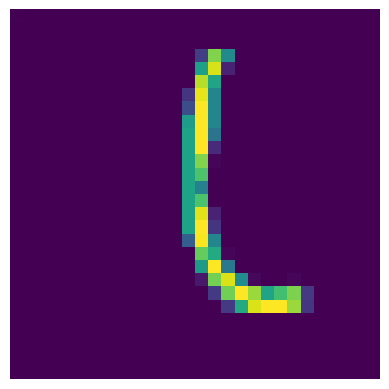

In [20]:
# X_test_2d = new_img.reshape(28,-1)
# X_test_2d.shape
plt.imshow(new_image) 
plt.axis('off')
plt.show()

In [21]:
def initial_params():    
    W1 = np.random.uniform(low=-0.5, high=0.5, size=(10,784))
    W2 = np.random.uniform(low=-0.5, high=0.5, size=(10,10))
    b1 = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
    b2 = np.random.uniform(low=-0.5, high=0.5, size=(10,1))

    # print(W1.shape, W2.shape, b1.shape, b2.shape)
    return W1, b1, W2, b2

_, _, W2, _ = initial_params()
W2[:100]

array([[-0.17770899, -0.01691247, -0.33314575, -0.01207657,  0.21426945,
         0.44464319, -0.41322341,  0.21940054, -0.35604575,  0.23014887],
       [ 0.19195447,  0.29044338, -0.32834343, -0.4614796 , -0.15393353,
         0.08941055, -0.42011384,  0.12308453,  0.15146105,  0.31016341],
       [ 0.31488338, -0.08125915, -0.11639424,  0.31701672, -0.35641738,
        -0.2489451 ,  0.13190666,  0.09472986,  0.21241221,  0.33883667],
       [ 0.29674004,  0.26671449,  0.13410376,  0.14199657, -0.05725042,
        -0.06590685,  0.40311285,  0.03335116,  0.37849748, -0.02906267],
       [-0.09443536, -0.19107363,  0.14292382,  0.27403804, -0.03702292,
         0.42564275,  0.28194141,  0.48359386, -0.31323944,  0.18850408],
       [ 0.33558957, -0.33760247, -0.3673052 ,  0.19253288,  0.38597174,
         0.45579934,  0.23079131,  0.02062318, -0.08834736, -0.02781641],
       [ 0.08406735,  0.18944776, -0.01405568, -0.03283766, -0.12446734,
        -0.23826215, -0.07896034, -0.09293064

In [22]:
def ReLU_fn(vector):
    relu = np.empty(shape=vector.shape)
    for i in range(len(vector)):
        if vector[i] >= 0.0:
            relu[i] = vector[i]
        else:
            relu[i] = 0.0

    return relu

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
relu = ReLU_fn(vector)
relu

array([[0.        ],
       [0.47598818],
       [0.        ],
       [0.40556871],
       [0.        ],
       [0.        ],
       [0.29237469],
       [0.        ],
       [0.242543  ],
       [0.        ]])

In [23]:
def d_ReLU(vector):
    relu = np.empty(shape=vector.shape)
    for i in range(len(vector)):
        if vector[i] >= 0.0:
            relu[i] = 1.0
        else:
            relu[i] = 0.0

    return relu

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
relu = d_ReLU(vector)
relu

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [24]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000])
vector

array([-0.04960465,  0.00237028,  0.27388453, -0.2998402 ,  0.38442177,
        0.17708221, -0.48386886, -0.37653578, -0.32561895,  0.41992916,
        0.        ])

(-0.5, 0.5)

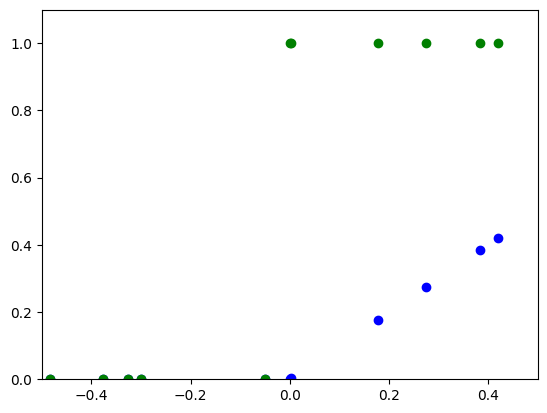

In [25]:
relu = ReLU_fn(vector)
d_relu = d_ReLU(vector)

plt.scatter(vector, relu, c='blue')
plt.scatter(vector, d_relu, c='green')
plt.ylim(0.0, 1.1)
plt.xlim(-0.5, 0.5)

In [26]:
def softmax_fn(vector):
    softmax = np.zeros(shape= vector.shape)
    for i in range(len(vector)):
        softmax[i] = 1 / (1+np.exp(-vector[i]))

    return softmax

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
softmax = softmax_fn(vector)
vector, softmax

(array([[ 0.33470715],
        [-0.12512747],
        [-0.42783864],
        [-0.31242612],
        [-0.24847124],
        [ 0.34581177],
        [ 0.48791805],
        [ 0.23294794],
        [ 0.16804718],
        [-0.34302683]]),
 array([[0.58290426],
        [0.46875888],
        [0.39464256],
        [0.42252266],
        [0.43819981],
        [0.58560158],
        [0.61961586],
        [0.55797505],
        [0.54191321],
        [0.41507441]]))

In [27]:
def df_softmax(vector):
    d_softmax = np.zeros(shape= vector.shape)
    for i in range(len(vector)):
        expon = np.exp(-i)
        d_softmax[i] = expon / np.power(1+expon, 2)

    return d_softmax

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
d_softmax = softmax_fn(vector)
vector, d_softmax

(array([[ 0.15648551],
        [-0.32699941],
        [-0.37442844],
        [-0.04618879],
        [-0.33395574],
        [-0.13567785],
        [-0.49916801],
        [ 0.12610235],
        [-0.41019149],
        [ 0.3800889 ]]),
 array([[0.53904174],
        [0.41897089],
        [0.40747139],
        [0.48845485],
        [0.41727844],
        [0.46613247],
        [0.37773621],
        [0.53148388],
        [0.39886621],
        [0.59389455]]))

(-0.5, 0.5)

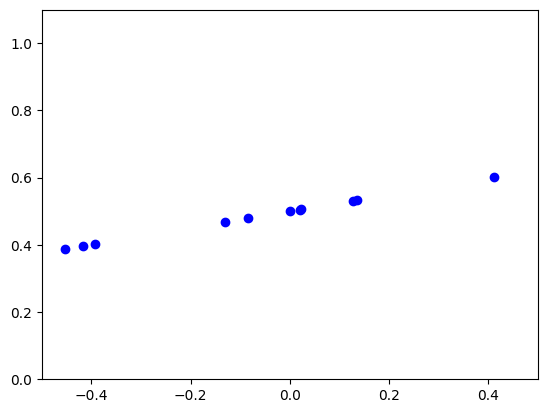

In [28]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000])
vector

softmax = softmax_fn(vector)
d_softmax = df_softmax(vector)

plt.scatter(vector, softmax, c='blue')
# plt.scatter(vector, d_softmax, c='green')
plt.ylim(0.0, 1.1)
plt.xlim(-0.5, 0.5)


In [29]:
# %pip install torch

In [30]:
# torch

ModuleNotFoundError: No module named 'torch'

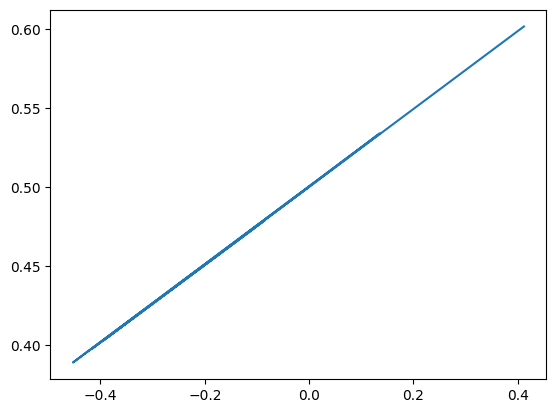

In [31]:
plt.plot(vector, softmax)

In [34]:
def forward_prop(W1, b1, W2, b2, A0):
    Z1 = np.matmul(W1, A0) + b1
    A1 = ReLU_fn(Z1)

    Z2 = np.matmul(W2, A1) + b2
    A2 = softmax_fn(Z2)

    return Z1, A1, Z2, A2

In [ ]:
def one_hot_encoding(Y):
    if Y 